# Lab 3 executable file

This file contains program code, which is the solution to the problems in the file [lab_3_task.txt](https://github.com/RazinAleksandr/M-M-MSA-ITMO/blob/main/Lab_3/lab_3_task.txt)

In [13]:
#Libraries initialization 
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

## Exercise №1

Choose variables for sampling from your dataset (overall – about 10 variables, 3-4 – target variables, the rest - predictors).

In [11]:
path_to_file = '/home/aleksrazin/ITMO/M&MSA/train_data/covid_19.csv'

df = pd.read_csv(path_to_file)
df = df[ [   
    'systolic_blood_pressure', 
    'diastolic_blood_pressure', 
    'heart_rate',
    'highest_heart_rate',
    'lowest_heart_rate', 
    'lowest_urine_output',
    'highest_ph',
    'hematocrit',
    'platelet_count',
    'potassium',
    'lowest_mean_arterial_pressure',
    'highest_mean_arterial_pressure',
    'temperature'
           ] ]
targets_df = df.iloc[:, :3].copy()
predictors_df = df.iloc[:, 3:].copy()
print('Targets:')
targets_df.head(5)

Targets:


,systolic_blood_pressure,diastolic_blood_pressure,heart_rate
0,119.0,54.0,79.0
1,133.0,64.0,73.0
2,140.0,74.0,70.0
3,154.0,78.0,77.0
4,155.0,61.0,64.0


In [12]:
print('Predictors:')
predictors_df.head(5)

Predictors:


,highest_heart_rate,lowest_heart_rate,lowest_urine_output,highest_ph,hematocrit,platelet_count,potassium,lowest_mean_arterial_pressure,highest_mean_arterial_pressure,temperature
0,80.0,73.0,700.0,NaN,0.354,116.0,4.1,85.0,85.0,37.2
1,73.0,69.0,1351.0,NaN,0.359,117.0,3.7,NaN,NaN,37.1
2,72.0,65.0,1420.0,NaN,0.372,145.0,4.0,NaN,NaN,37.5
3,80.0,72.0,350.0,NaN,0.383,218.0,3.9,NaN,NaN,37.1
4,77.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7


## Exercise №2

Using univariate parametric distributions that were fitted in Lab#2 (or Lab#1) make sampling of chosen target variables. Use for this 2 different sampling methods.

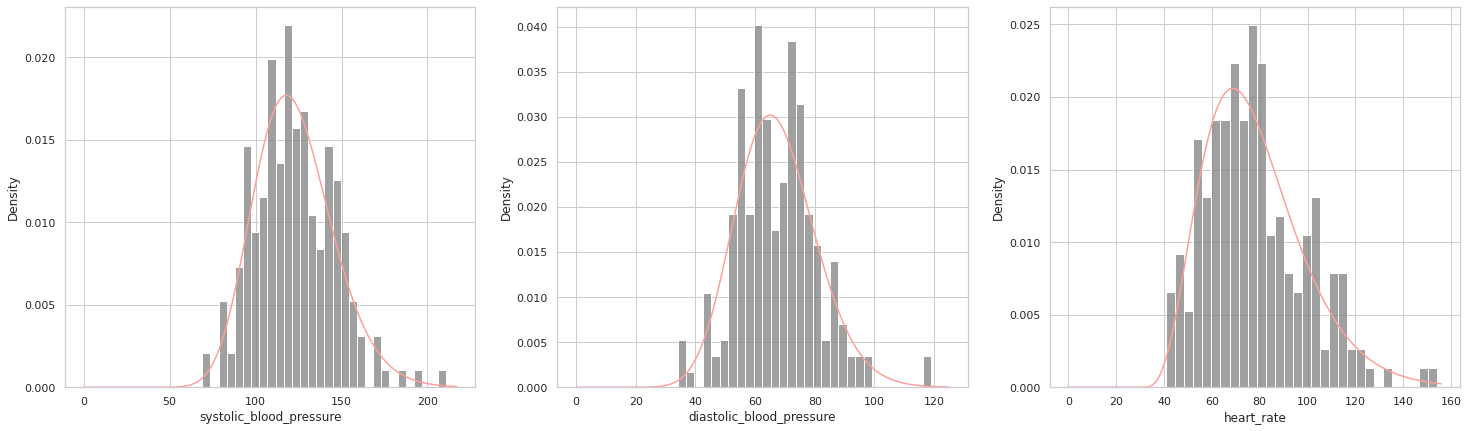

In [8]:
# Bring 3 target univariate parametric distributions from Lab 2
sns.set_theme(style='whitegrid', palette='pastel')
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
for i, col_name in enumerate(targets_df):
    df=df.dropna()
    sns.histplot(df[col_name], kde=False, bins=30, stat='density', ax=axes[i], palette='Set3', color = 'grey')
    max_amount = targets_df[col_name].max()
    x = np.linspace(0, max_amount, 1000)

    if col_name == 'systolic_blood_pressure' or col_name == 'diastolic_blood_pressure':
        # The lognorm distribution parameters are determined using the fit function based on the maximum likelihood method
        mle_params = sp.stats.lognorm.fit(df[col_name], loc=1.1, scale=1.1) # Make initial Guess
        pdf_mle = sp.stats.lognorm.pdf(x, *mle_params)

    elif col_name == 'heart_rate':
        mle_params = sp.stats.chi2.fit(df[col_name])
        pdf_mle = sp.stats.chi2.pdf(x, *mle_params)
    
    axes[i].plot(x, pdf_mle, color='r')

/home/aleksrazin/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:1302: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


<AxesSubplot:xlabel='heart_rate', ylabel='Density'>

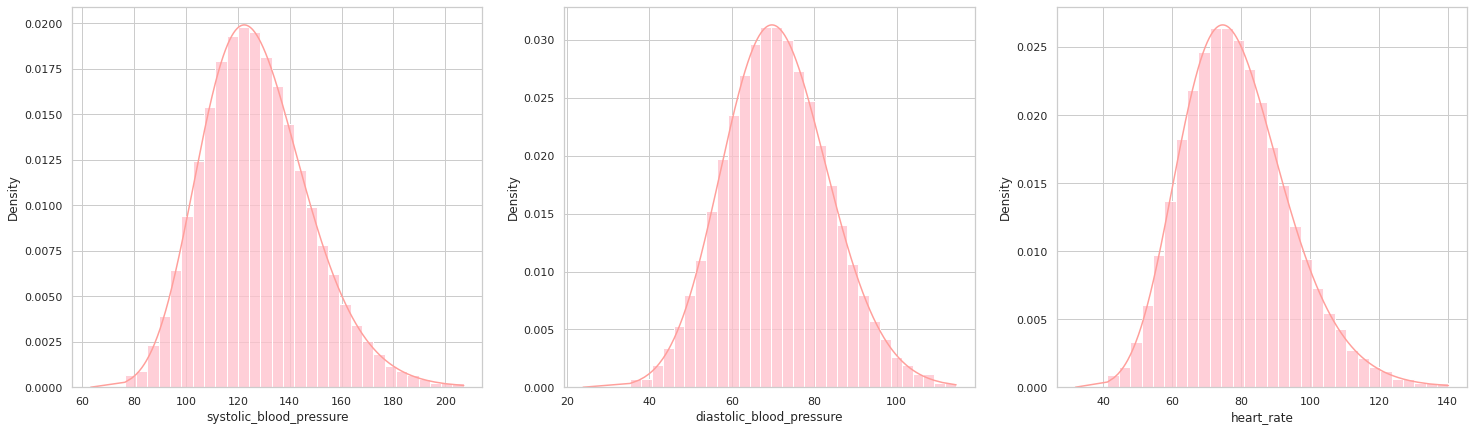

In [9]:
# Inverse transform sampling
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
targets_df=targets_df.dropna()
params_1 = sp.stats.lognorm.fit(targets_df['systolic_blood_pressure'], loc=1.1, scale=1.1)
x = np.linspace(0.001, 100, 1000)
ppf_1 = sp.stats.lognorm.ppf(x / 100.0, *params_1)
pdf_1 = sp.stats.lognorm.pdf(ppf_1, *params_1)
axes[0].plot(ppf_1, pdf_1 , 'r')
axes[0].set(xlabel='systolic_blood_pressure')
synthetic_data=ppf_1[1:ppf_1.size-1]
sns.histplot(synthetic_data, kde=False, bins=30, stat='density', ax=axes[0], palette='Set3', color = 'pink')

params_2 = sp.stats.chi2.fit(targets_df['diastolic_blood_pressure'])
x = np.linspace(0.001, 100, 1000)
ppf_2 = sp.stats.chi2.ppf(x / 100.0, *params_2)
pdf_2 = sp.stats.chi2.pdf(ppf_2, *params_2)
axes[1].plot(ppf_2, pdf_2 , 'r')
axes[1].set(xlabel='diastolic_blood_pressure')
synthetic_data=ppf_2[1:ppf_2.size-1]
sns.histplot(synthetic_data, kde=False, bins=30, stat='density', ax=axes[1], palette='Set3', color = 'pink')

params_3 = sp.stats.lognorm.fit(targets_df['heart_rate'], loc=1.1, scale=1.1)
x = np.linspace(0.001, 100, 1000)
ppf_3 = sp.stats.lognorm.ppf(x / 100.0, *params_3)
pdf_3 = sp.stats.lognorm.pdf(ppf_3, *params_3)
axes[2].plot(ppf_3, pdf_3 , 'r')
axes[2].set(xlabel='heart_rate')
synthetic_data=ppf_3[1:ppf_3.size-1]
sns.histplot(synthetic_data, kde=False, bins=30, stat='density', ax=axes[2], palette='Set3', color = 'pink')


[Text(0.5, 0, 'heart_rate'), Text(0, 0.5, 'Density')]

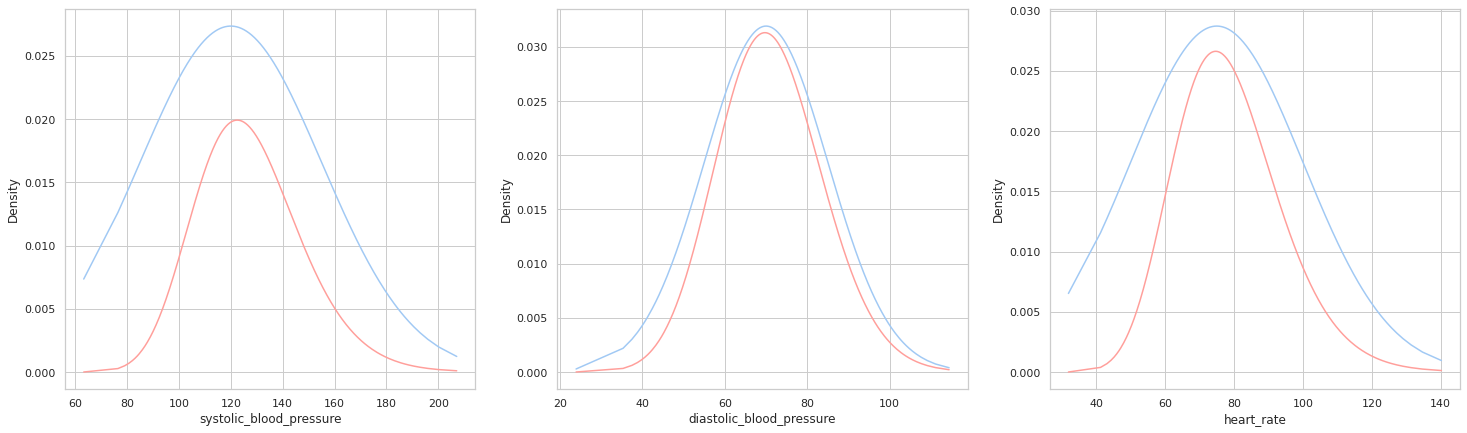

In [32]:
# Accept-Reject sampling

# Gaussian PDF
def gaussian(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

# Lognormal PDF
def lognormal(x, s):
    return 1/(s*x*np.sqrt(2*np.pi)) * np.exp(-np.log(x)**2/(2*s**2))

fig, axes = plt.subplots(1, 3, figsize=(25, 7))

gaussian_1 = gaussian(ppf_1, 120, 35)
multiplier = 2.4
axes[0].plot(ppf_1, pdf_1 , 'r')
axes[0].plot(ppf_1, multiplier * gaussian_1 , 'b')
axes[0].set(xlabel='systolic_blood_pressure', ylabel='Density')

gaussian_2 = gaussian(ppf_2, 70, 15)
multiplier = 1.2
axes[1].plot(ppf_2, pdf_2 , 'r')
axes[1].plot(ppf_2, multiplier * gaussian_2 , 'b')
axes[1].set(xlabel='diastolic_blood_pressure', ylabel='Density')

gaussian_3 = gaussian(ppf_3, 75, 25)
multiplier = 1.8
axes[2].plot(ppf_3, pdf_3 , 'r')
axes[2].plot(ppf_3, multiplier * gaussian_3 , 'b')
axes[2].set(xlabel='heart_rate', ylabel='Density')

[Text(0.5, 0, 'heart_rate'), Text(0, 0.5, 'Density')]

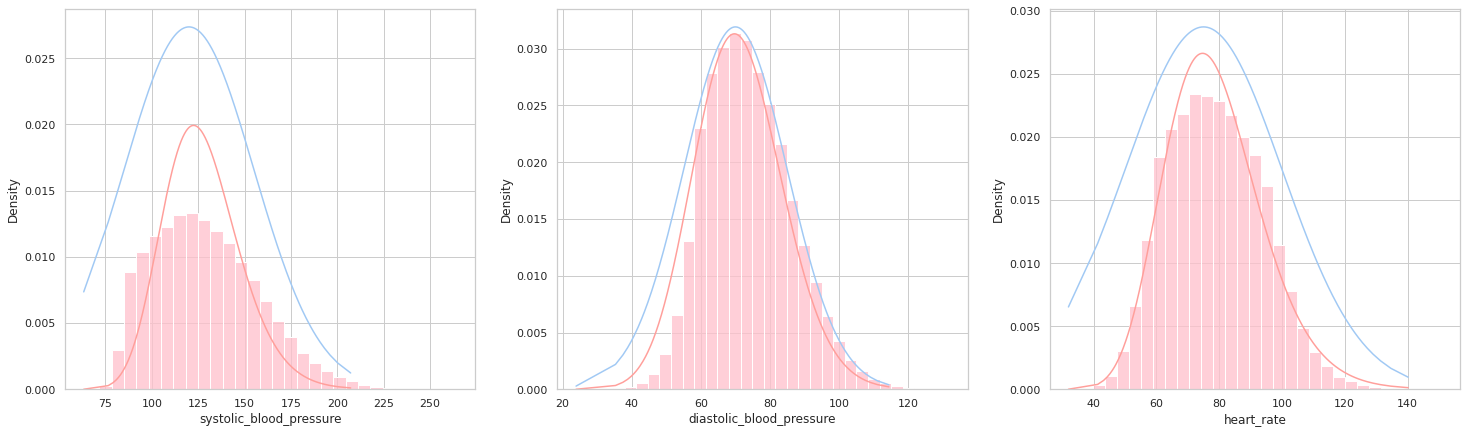

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

#number of instances
N = 100000
samples_1 = []
multiplier = 2.4
for _ in range(N):
    candidate = np.random.normal(120, 35)
    prob_accept = sp.stats.lognorm.pdf(candidate, *params_1) / (multiplier * gaussian(candidate, 23, 25))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_1.append(candidate)

sns.histplot(samples_1, kde=False, bins=30, stat='density', ax=axes[0], palette='Set3', color = 'pink')
axes[0].plot(ppf_1, pdf_1 , 'r')
axes[0].plot(ppf_1, multiplier * gaussian_1 , 'b')
axes[0].set(xlabel='systolic_blood_pressure', ylabel='Density')

samples_2 = []
multiplier = 1.2
for _ in range(N):
    candidate = np.random.normal(70, 15)
    prob_accept = sp.stats.chi2.pdf(candidate, *params_2) / (multiplier * gaussian(candidate, 48, 15))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_2.append(candidate)

sns.histplot(samples_2, kde=False, bins=30, stat='density', ax=axes[1], palette='Set3', color = 'pink')
axes[1].plot(ppf_2, pdf_2 , 'r')
axes[1].plot(ppf_2, multiplier * gaussian_2 , 'b')
axes[1].set(xlabel='diastolic_blood_pressure', ylabel='Density')

samples_3 = []
multiplier = 1.8
for _ in range(N):
    candidate = np.random.normal(75, 25)
    prob_accept = sp.stats.lognorm.pdf(candidate, *params_3) / (multiplier * gaussian(candidate, 64, 45))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_3.append(candidate)

sns.histplot(samples_3, kde=False, bins=30, stat='density', ax=axes[2], palette='Set3', color = 'pink')
axes[2].plot(ppf_3, pdf_3 , 'r')
axes[2].plot(ppf_3, multiplier * gaussian_3 , 'b')
axes[2].set(xlabel='heart_rate', ylabel='Density')

## Exercise №3

Estimate relations between predictors and chosen target variables. At least, they should have significant correlation coefficients.

<AxesSubplot:>

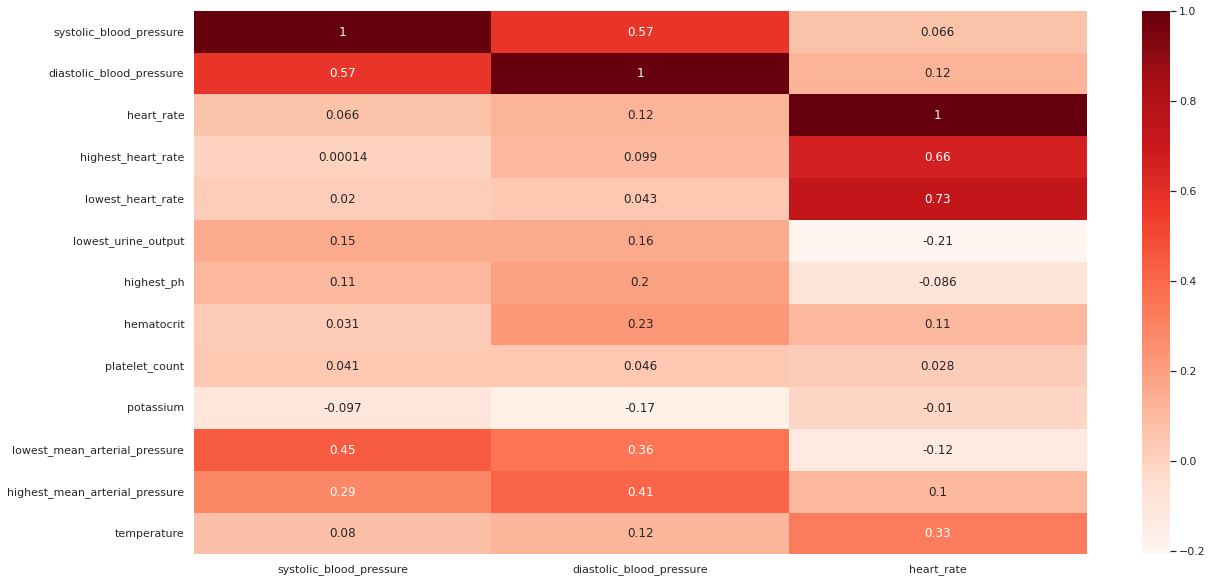

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(df.corr()[['systolic_blood_pressure','diastolic_blood_pressure','heart_rate']], cmap='Reds', annot=True)